# Investigating the Maxwell-Boltzmann distribution

In [171]:
import numpy as np

from scipy.constants import pi
import scipy.integrate as integrate

import matplotlib.pyplot as plt
%matplotlib inline

## Definitions
### Definition of functions

In [200]:
def maxwell_boltzmann_distribution(x, m, k, T):
    return 4 * np.pi * (m / (2 * np.pi * k * T))**0.5 * x**2 * np.exp(- (m * x**2) / (2 * k * T))

In [196]:
def velocity_distribution_direction(x, m, k, T):
    return (m / (2 * np.pi * k * T))**0.5 * np.exp(-m * x**2 / (2 * k * T))

### Definition of constants

In [203]:
M_carbon_dioxide = 44 # mass of carbon dioxide in g/mol
m_carbon_dioxide = M_carbon_dioxide / scipy.constants.Avogadro # mass in kg

M_hydrogen = 2 # mass of hydrogen in g/mol
m_hydrogen = M_hydrogen / scipy.constants.Avogadro # mass in kg

M_boran = 14 # mass of BH3 in g/mol
m_boran = M_boran / scipy.constants.Avogadro # mass in kg

T = 298 # Temperature in K

k = scipy.constants.k # Boltzmann constant

## The velocity distribution in one direction

In [204]:
integral_of_velocity_distribution_carbon_dioxide = integrate.quad(velocity_distribution_direction, -np.inf, np.inf, args=(m_carbon_dioxide, k, T))[0]
integral_of_velocity_distribution_hydrogen = integrate.quad(velocity_distribution_direction, -np.inf, np.inf, args=(m_hydrogen, k, T))[0]
integral_of_velocity_distribution_boran = integrate.quad(velocity_distribution_direction, -np.inf, np.inf, args=(m_boran, k, T))[0]

print("Integral for CO2 = ", round(integral_of_velocity_distribution_carbon_dioxide, 1))
print("Integral for H2 = ", round(integral_of_velocity_distribution_hydrogen, 1))
print("Integral for BH3 = ", round(integral_of_velocity_distribution_boran, 1))

Integral for CO2 =  1.0
Integral for H2 =  1.0
Integral for BH3 =  1.0


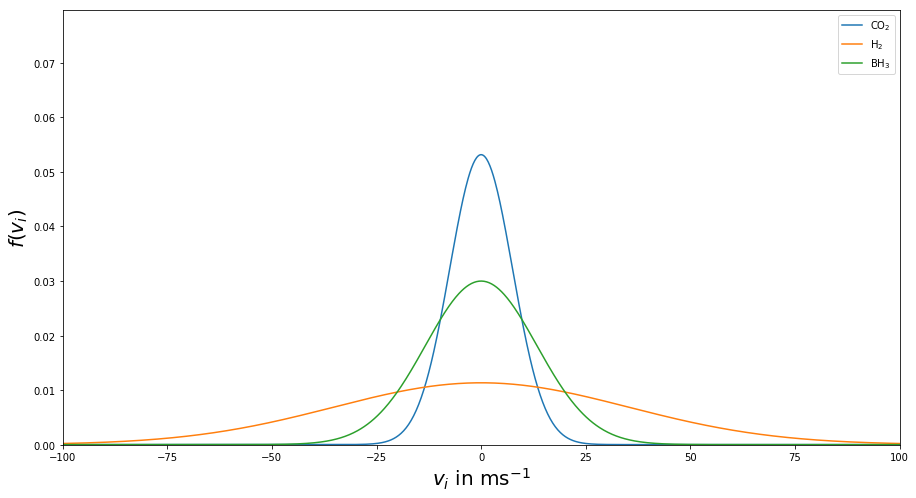

In [210]:
x_min = -100
x_max = 100

y_max = 1.5 * (m_carbon_dioxide / (2 * np.pi * k * T))**0.5 

x_data = np.linspace(x_min, x_max, 1000)
y_data_carbon_dioxide = velocity_distribution_direction(x_data, m_carbon_dioxide, k, T)
y_data_hydrogen = velocity_distribution_direction(x_data, m_hydrogen, k, T)
y_data_boran = velocity_distribution_direction(x_data, m_boran, k, T)

plt.figure(figsize=(15, 8))

plt.plot(x_data, y_data_carbon_dioxide, label="CO$_{2}$")
plt.plot(x_data, y_data_hydrogen, label="H$_{2}$")
plt.plot(x_data, y_data_boran, label="BH$_{3}$")

plt.legend()

plt.xlim(xmin = x_min, xmax = x_max)
plt.ylim(ymin = 0, ymax = y_max)

plt.xlabel('$v_{i}$ in ms$^{-1}$', fontsize=20)
plt.ylabel('$f(v_{i})$', fontsize=20)

plt.show()

## Maxwell-Boltzmann distribution